In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Absolutely horrible custome...
1,Not Verified | BA is not what it used to be! ...
2,"✅ Trip Verified | BA First, it's not even the..."
3,✅ Trip Verified | The worst business class ex...
4,Not Verified | Quite possibly the worst busin...


In [4]:
df

,reviews
0,✅ Trip Verified | Absolutely horrible custome...
1,Not Verified | BA is not what it used to be! ...
2,"✅ Trip Verified | BA First, it's not even the..."
3,✅ Trip Verified | The worst business class ex...
4,Not Verified | Quite possibly the worst busin...
...,...
995,✅ Trip Verified | I had a miserable experienc...
996,✅ Trip Verified | Leeds Bradford to Las Vegas...
997,✅ Trip Verified | Dallas to London Heathrow i...
998,✅ Trip Verified | Tenerife to Heathrow. Effec...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,Absolutely horrible customer service - will ...
1,BA is not what it used to be! As much as I l...
2,"BA First, it's not even the best business cl..."
3,The worst business class experience. Ground ...
4,Quite possibly the worst business class I ha...
...,...
995,I had a miserable experience in first class ...
996,Leeds Bradford to Las Vegas via Heathrow. Cu...
997,Dallas to London Heathrow in First Class. Th...
998,Tenerife to Heathrow. Effectively a budget a...


In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Absolutely horrible customer service - will ...,Absolutely horrible customer service will nev...
1,BA is not what it used to be! As much as I l...,BA is not what it used to be As much as I lik...
2,"BA First, it's not even the best business cl...",BA First it s not even the best business clas...
3,The worst business class experience. Ground ...,The worst business class experience Ground cr...
4,Quite possibly the worst business class I ha...,Quite possibly the worst business class I hav...


In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Absolutely horrible customer service - will ...,Absolutely horrible customer service will nev...,"[(Absolutely, r), (horrible, a), (customer, n)..."
1,BA is not what it used to be! As much as I l...,BA is not what it used to be As much as I lik...,"[(BA, n), (used, v), (much, a), (like, v), (on..."
2,"BA First, it's not even the best business cl...",BA First it s not even the best business clas...,"[(BA, n), (First, n), (even, r), (best, a), (b..."
3,The worst business class experience. Ground ...,The worst business class experience Ground cr...,"[(worst, a), (business, n), (class, n), (exper..."
4,Quite possibly the worst business class I ha...,Quite possibly the worst business class I hav...,"[(Quite, r), (possibly, r), (worst, a), (busin..."


In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Absolutely horrible customer service - will ...,Absolutely horrible customer service will nev...,"[(Absolutely, r), (horrible, a), (customer, n)...",Absolutely horrible customer service never f...
1,BA is not what it used to be! As much as I l...,BA is not what it used to be As much as I lik...,"[(BA, n), (used, v), (much, a), (like, v), (on...",BA use much like onboard crew check staff la...
2,"BA First, it's not even the best business cl...",BA First it s not even the best business clas...,"[(BA, n), (First, n), (even, r), (best, a), (b...",BA First even best business class sky Cabin ...
3,The worst business class experience. Ground ...,The worst business class experience Ground cr...,"[(worst, a), (business, n), (class, n), (exper...",bad business class experience Ground crew Si...
4,Quite possibly the worst business class I ha...,Quite possibly the worst business class I hav...,"[(Quite, r), (possibly, r), (worst, a), (busin...",Quite possibly bad business class ever fly b...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Absolutely horrible customer service - will ...,Absolutely horrible customer service never f...
1,BA is not what it used to be! As much as I l...,BA use much like onboard crew check staff la...
2,"BA First, it's not even the best business cl...",BA First even best business class sky Cabin ...
3,The worst business class experience. Ground ...,bad business class experience Ground crew Si...
4,Quite possibly the worst business class I ha...,Quite possibly bad business class ever fly b...
...,...,...
995,I had a miserable experience in first class ...,miserable experience first class London Chic...
996,Leeds Bradford to Las Vegas via Heathrow. Cu...,Leeds Bradford Las Vegas via Heathrow Custom...
997,Dallas to London Heathrow in First Class. Th...,Dallas London Heathrow First Class bad exper...
998,Tenerife to Heathrow. Effectively a budget a...,Tenerife Heathrow Effectively budget airline...


In [12]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Absolutely horrible customer service - will ...,Absolutely horrible customer service will nev...,"[(Absolutely, r), (horrible, a), (customer, n)...",Absolutely horrible customer service never f...,-0.7680,Negative
1,BA is not what it used to be! As much as I l...,BA is not what it used to be As much as I lik...,"[(BA, n), (used, v), (much, a), (like, v), (on...",BA use much like onboard crew check staff la...,0.9532,Positive
2,"BA First, it's not even the best business cl...",BA First it s not even the best business clas...,"[(BA, n), (First, n), (even, r), (best, a), (b...",BA First even best business class sky Cabin ...,0.4148,Neutral
3,The worst business class experience. Ground ...,The worst business class experience Ground cr...,"[(worst, a), (business, n), (class, n), (exper...",bad business class experience Ground crew Si...,0.8700,Positive
4,Quite possibly the worst business class I ha...,Quite possibly the worst business class I hav...,"[(Quite, r), (possibly, r), (worst, a), (busin...",Quite possibly bad business class ever fly b...,0.8777,Positive


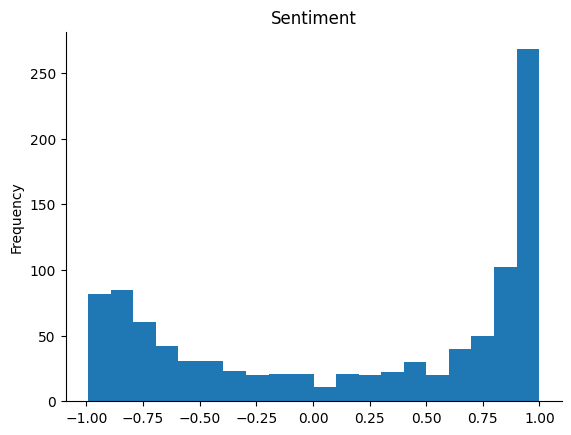

In [19]:


from matplotlib import pyplot as plt
df['Sentiment'].plot(kind='hist', bins=20, title='Sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    480
Negative    412
Neutral     108
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x781869659930>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.4305111002419281, -1.0122550037260791, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.23482423649559714, -0.5521390929414977, '41.2%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

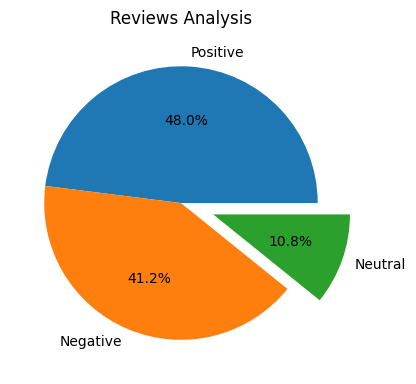

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [17]:
df.to_csv("BA_sentimentanalysis.csv")

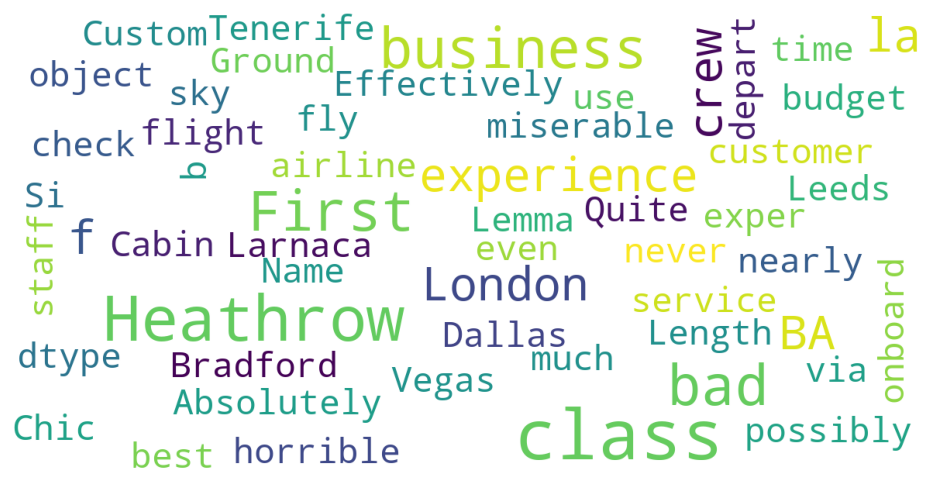

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)